In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
file = "test_zomato.csv"
df = pd.read_csv(file)

In [5]:
df.head()

,Unnamed: 0,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162.0,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,1,6304287,Izakaya Kikufuji,162.0,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,2,6300002,Heat - Edsa Shangri-La,162.0,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,3,6318506,Ooma,162.0,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,4,6314302,Sambo Kojin,162.0,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


In [6]:
# Display basic information about the dataset
print("Columns Name", df.columns)
print("Top 10 rows:\n", df.head(10))
print("Size of the dataset (rows.columns):", df.shape)
print("Basic Statistics:\n", df.describe())
print("Columns and their data types:\n", df.info())
print("Checking for missing values:\n", df.isnull().sum())
# Remove missing Values:
print("Drop Missing Values ",df.dropna())
print("Drop Duplicates Values", df.drop_duplicates(inplace=True))

Columns Name Index(['Unnamed: 0', 'Restaurant ID', 'Restaurant Name', 'Country Code',
       'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')
Top 10 rows:
   Unnamed: 0 Restaurant ID                           Restaurant Name  \
0          0       6317637                          Le Petit Souffle   
1          1       6304287                          Izakaya Kikufuji   
2          2       6300002                    Heat - Edsa Shangri-La   
3          3       6318506                                      Ooma   
4          4       6314302                               Sambo Kojin   
5          5      18189371                              Din Tai Fung   
6          6       6300781                        

In [7]:
# Top 10 cities have the Most Expensive Restaurants-------------
# Convert 'Average Cost for two' to numeric, coercing errors to NaN
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')
# Drop rows where 'Average Cost for two' is NaN
df = df.dropna(subset=['Average Cost for two'])
# Group by city and calculate the mean cost for two
top_expensive_cities = df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)
print("Top 10 cities with the most expensive restaurants:\n", top_expensive_cities)

Top 10 cities with the most expensive restaurants:
 City
Jakarta             308437.500000
Tangerang           250000.000000
Bogor               160000.000000
Bandung             150000.000000
Pasay City            3333.333333
Colombo               2375.000000
Mandaluyong City      2000.000000
Panchkula             2000.000000
Taguig City           1725.000000
Hyderabad             1361.111111
Name: Average Cost for two, dtype: float64


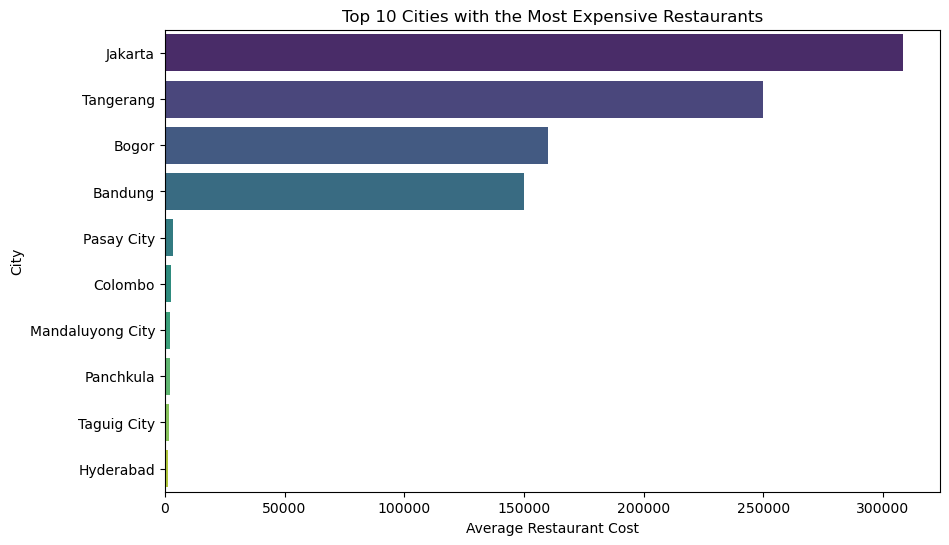

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_expensive_cities.values, y=top_expensive_cities.index, palette="viridis")
plt.xlabel("Average Restaurant Cost")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Expensive Restaurants")
plt.show()

In [9]:
# Top 10 cities have Cheapest Restaurants-------------
# Group by city and calculate the mean cost for two, then sort in ascending order for cheapest restaurants
cheapest_cities = df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=True).head(10)
print("Top 10 cities with the cheapest restaurants:\n", cheapest_cities)

Top 10 cities with the cheapest restaurants:
 City
Miller              0.0
Dicky Beach         7.0
Inverloch           7.0
Lakes Entrance      7.0
Lakeview           10.0
Fernley            10.0
Clatskanie         10.0
Mc Millan          10.0
Vernonia           10.0
Hepburn Springs    13.5
Name: Average Cost for two, dtype: float64


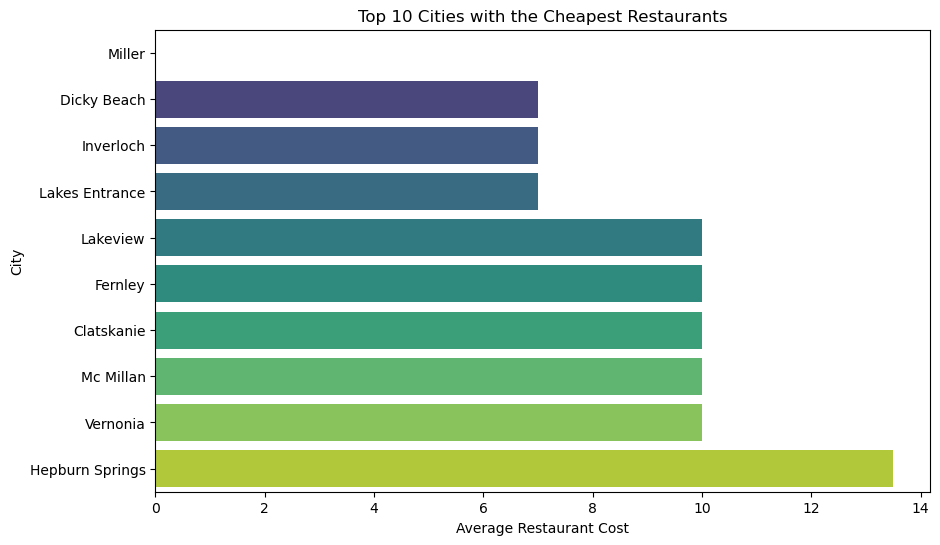

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cheapest_cities.values, y=cheapest_cities.index, palette="viridis")
plt.xlabel("Average Restaurant Cost")
plt.ylabel("City")
plt.title("Top 10 Cities with the Cheapest Restaurants")
plt.show()

In [11]:
# Top 10 cities have highest rated restaurants-------------
# Convert 'Aggregate Rating' (or 'Rating') to numeric, coercing errors to NaN
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
# Drop rows where 'Aggregate Rating' is NaN
df = df.dropna(subset=['Aggregate rating'])
# Group by city and calculate the mean rating, then sort in descending order for highest ratings
top_rated_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 cities with the highest-rated restaurants:\n", top_rated_cities)

Top 10 cities with the highest-rated restaurants:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64


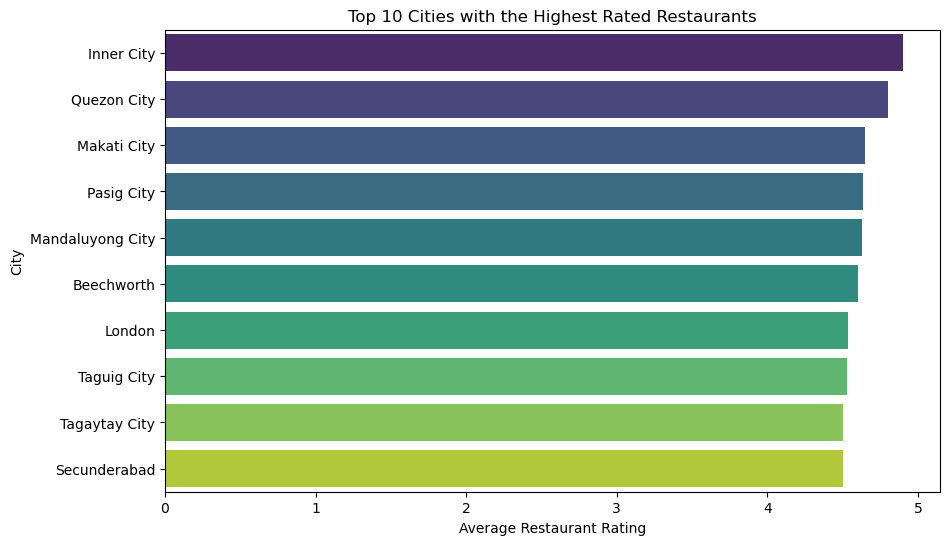

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_cities.values, y=top_rated_cities.index, palette="viridis")
plt.xlabel("Average Restaurant Rating")
plt.ylabel("City")
plt.title("Top 10 Cities with the Highest Rated Restaurants")
plt.show()

In [13]:
# Restaurants that do not provide a table booking facility----------
no_table_booking = df[df['Has Table booking'] == 'No']
print("Restaurants that do not provide a table booking facility:\n", no_table_booking[['Restaurant Name', 'City', 'Address']])

Restaurants that do not provide a table booking facility:
                Restaurant Name              City  \
3                         Ooma  Mandaluyong City   
5                 Din Tai Fung  Mandaluyong City   
10            Silantro Fil-Mex        Pasig City   
12            Silantro Fil-Mex       Quezon City   
14     Sodam Korean Restaurant     San Juan City   
...                        ...               ...   
9547              NamlÛ± Gurme         ÛÁstanbul   
9548             Ceviz AÛôacÛ±         ÛÁstanbul   
9549                     Huqqa         ÛÁstanbul   
9550              Aôôk Kahve         ÛÁstanbul   
9551  Walter's Coffee Roastery         ÛÁstanbul   

                                                Address  
3     Third Floor, Mega Fashion Hall, SM Megamall, O...  
5     Ground Floor, Mega Fashion Hall, SM Megamall, ...  
10         75 East Capitol Drive, Kapitolyo, Pasig City  
12    Second Floor, UP Town Center, Katipunan Avenue...  
14    17 J. Abad Santos Dr

In [14]:
# Count of the Restaurants which provide Table Booking Facility
table_booking_counts = df['Has Table booking'].value_counts()

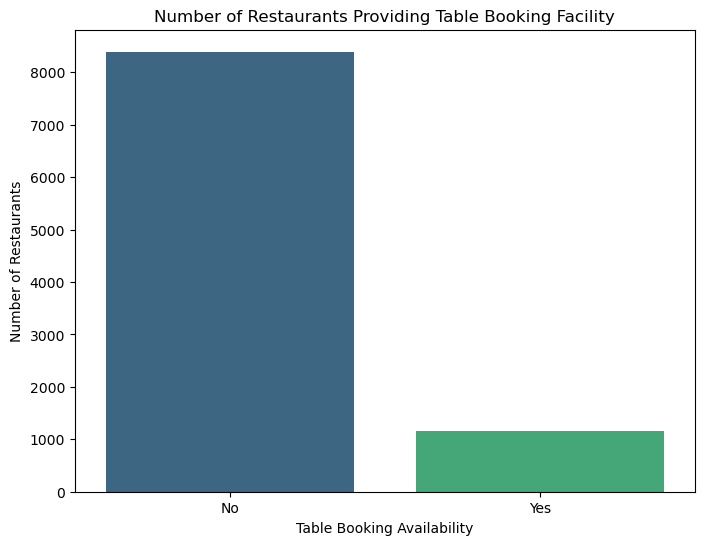

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=table_booking_counts.index, y=table_booking_counts.values, palette="viridis")
plt.xlabel("Table Booking Availability")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants Providing Table Booking Facility")
plt.show()

In [16]:
# Count the number of restaurants in each country code
country_counts = df['Country Code'].value_counts()
# Get the top 3 countries with the most restaurants
top_countries = country_counts.head(3)
print("Top 3 countries according to the number of restaurants:\n", top_countries)

Top 3 countries according to the number of restaurants:
 Country Code
1.0      8652
216.0     434
215.0      80
Name: count, dtype: int64


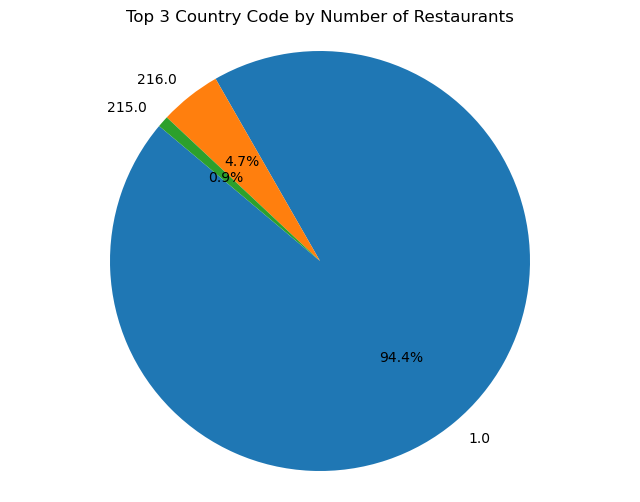

In [17]:
plt.figure(figsize=(8, 6))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 3 Country Code by Number of Restaurants")
plt.axis('equal')
plt.show()

In [18]:
# Less than 4/5 rating Restaurant in between index numbers 1400 to 1405(excluding)
# Convert 'Aggregate Rating' (or the relevant rating column) to numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
# Filter for Indian restaurants (assuming the country code for India is 1)
indian_restaurants = df[df['Country Code'] == 1]
# Select rows between index 1400 and 1405 (excluding 1405)
indian_restaurants_subset = indian_restaurants.iloc[1400:1405]
# Further filter for restaurants with ratings less than 4
low_rated_restaurants = indian_restaurants_subset[indian_restaurants_subset['Aggregate rating'] < 4]
print("Indian restaurants with less than 4 ratings between index 1400 and 1405:\n", low_rated_restaurants[['Restaurant Name', 'Aggregate rating']])

Indian restaurants with less than 4 ratings between index 1400 and 1405:
             Restaurant Name  Aggregate rating
2025          Burger Xpress               3.4
2026            Dilli Light               2.6
2027  KB's Kulfi & Icecream               2.8
2028      MyLoveBiryani.Com               3.2
2029          Tandoori Adda               3.2


In [19]:
# Most Expensive Restaurant in between index numbers 1400 to 1405(excluding)---------
# Convert 'Average Cost for two' to numeric, coercing errors to NaN
indian_restaurants_subset['Average Cost for two'] = pd.to_numeric(indian_restaurants_subset['Average Cost for two'], errors='coerce')
# Drop rows where 'Average Cost for two' is NaN
indian_restaurants_subset = indian_restaurants_subset.dropna(subset=['Average Cost for two'])
most_expensive_restaurant = indian_restaurants_subset.loc[indian_restaurants_subset['Average Cost for two'].idxmax()]
print("Most expensive Indian restaurant between index 1400 and 1405 (excluding 1405):\n")
print(most_expensive_restaurant[['Restaurant Name', 'City', 'Average Cost for two']])

Most expensive Indian restaurant between index 1400 and 1405 (excluding 1405):

Restaurant Name         Dilli Light
City                        Gurgaon
Average Cost for two          600.0
Name: 2026, dtype: object


In [20]:
# Cheapest Restaurant in between index numbers 1400 to 1405(excluding)
cheapest_restaurant = indian_restaurants_subset.loc[indian_restaurants_subset['Average Cost for two'].idxmin()]
print("Cheapest Indian Restaurant between index 1400 and 1405 (excluding 1405):")
print(cheapest_restaurant[['Restaurant Name','City', 'Average Cost for two']])

Cheapest Indian Restaurant between index 1400 and 1405 (excluding 1405):
Restaurant Name         KB's Kulfi & Icecream
City                                  Gurgaon
Average Cost for two                    200.0
Name: 2027, dtype: object
